In [8]:
import sys
sys.path.append('../../')
sys.path.append('../../../flaming-choripan')

In [9]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = 'save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_RAW_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (save)
(0) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa.rawlcd - 0.931[mbs]
(1) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd - 0.931[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (save)
(0) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa.rawlcd - 0.931[mbs]
(1) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd - 0.931[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────


In [30]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.progress_bars import ProgressBar
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filedir):
    assert filedir.split('.')[-1]==C_.EXT_RAW_LIGHTCURVE
    return load_pickle(filedir)

filedir = 'save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN.rawlcd'
filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd'
#filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa.rawlcd'
#filedir = 'save/FakeSNe/survey-FakeSNe_bands-gr_classes-3.rawlcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y'])
LCDataset(
(raw)
 - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806)
 - max_length_serial: 205 - max_duration: 578.23
 - population: {'SLSN': 21, 'SNIa': 799, 'SNIbc': 51, 'merSNII': 228}
)


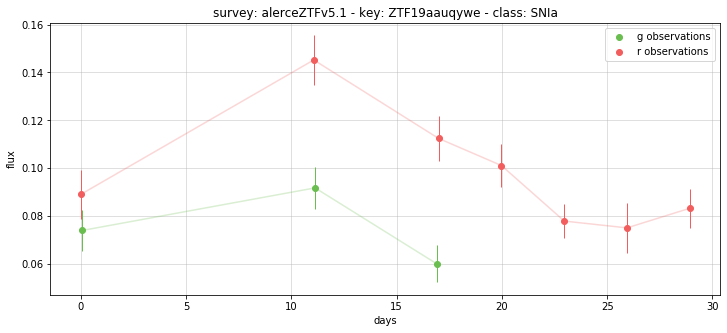

In [31]:
import flamingchoripan.lists as lists
import matplotlib.pyplot as plt
from lchandler.plots.lc import plot_lightcurve

lcset = lcdataset['raw']
lcobj, key = lcset.get_random_lcobj()
fig, ax = plt.subplots(1,1, figsize=(12,5))
for kb,b in enumerate(lcset.band_names):
    plot_lightcurve(ax, lcobj, b, label=f'{b} observations')
ax.set_title(f'survey: {lcset.survey} - key: {key} - class: {lcset.class_names[lcobj.y]}')
ax.set_xlabel('days')
ax.set_ylabel('flux')
ax.legend()
ax.grid(alpha=0.5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dataset


[]

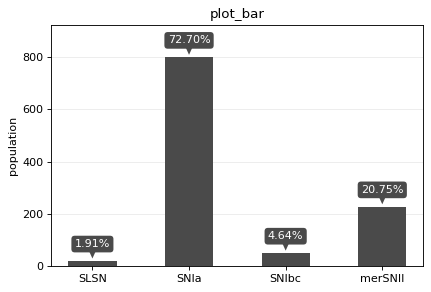

In [32]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cuteplots.plots as cplots
import flamingchoripan.cuteplots.colors as cc

cmap = cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']])
labels = lcdataset['raw'].get_lcobj_classes()
fig, ax = cplots.plot_hist_labels(labels, lcdataset['raw'].class_names, cmap=cmap)
plt.plot()

In [41]:
%load_ext autoreload
%autoreload 2

new_sets = {
    'raw_train':0.8,
    'raw_val':0.2,
    #'raw_test':0.1,
}
lcdataset.split('raw', new_sets)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset(
(raw)
 - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806)
 - max_length_serial: 205 - max_duration: 578.23
 - population: SLSN: 21(1.9%) - SNIa: 799(72.7%) - SNIbc: 51(4.6%) - merSNII: 228(20.7%)
(raw_train)
 - samples: 877 - obs samples: 24,714 (g: 10,203 - r: 14,511)
 - max_length_serial: 205 - max_duration: 578.23
 - population: SLSN: 16(1.8%) - SNIa: 639(72.9%) - SNIbc: 40(4.6%) - merSNII: 182(20.8%)
(raw_val)
 - samples: 222 - obs samples: 5,632 (g: 2,337 - r: 3,295)
 - max_length_serial: 155 - max_duration: 489.58
 - population: SLSN: 5(2.3%) - SNIa: 160(72.1%) - SNIbc: 11(5.0%) - merSNII: 46(20.7%)
)


In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from src.sigma_clipping import sigma_clipping

sigma_clipping_kwargs = {
    'sigma_n':5,
    'sigma_m':3,
    'apply_lower_bound':False,
    'verbose':0,
}
for ks,set_name in enumerate(['raw_train', 'raw_val']):
    deleted_points = sigma_clipping(lcdataset, set_name, **sigma_clipping_kwargs)

print(lcdataset)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_sigma_distribution

plot_sigma_distribution(lcdataset, 'raw_train')
plot_sigma_distribution(lcdataset, 'train')

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_sigma_distribution

plot_sigma_distribution(lcdataset, 'raw_val')
plot_sigma_distribution(lcdataset, 'val')

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc

figsize = (12,5)
fig, axs = plt.subplots(1, 2, figsize=figsize)
for ks,set_name in enumerate(['train', 'val']):
    ax = axs[ks]
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc

figsize = (12,5)
fig, axs = plt.subplots(1, 2, figsize=figsize)
for ks,set_name in enumerate(['train', 'val']):
    ax = axs[ks]
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {c:{f'{b} band':lcset.get_lcobj_obsmean_classes_b(b)[c] for b in lcset.band_names} for c in lcset.class_names}
    title = 'band observations/class samples distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else 'band observations/class samples',
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([C_.COLOR_DICT[b] for b in lcset.band_names]),
        'add_percent_annotations':True,
    }
    fig, ax = cplots.plot_bar(to_plot, [f'{b} band' for b in lcset.band_names], **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [ ]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

kfid = 0
new_cfilename = f'{cfilename}_kfid-{kfid}'
save_filedir = f'{root_folder}/{new_cfilename}.{C_.EXT_SPLIT_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)